In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

In [2]:
data = pd.read_excel('index_values_202312_short.xlsx', index_col = 0, parse_dates = True)

In [3]:
returns = (data/data.shift(1)) - 1
returns.dropna(inplace=True)

In [4]:
returns.head()

,JPCAEU3M,LEG1TREU,LEGATREH,LG30TREH,MXWOHEUR,NDDUWI,NCUDWI,NDUEEGF
Data,,,,,,,,
2019-01-31,-0.000236,0.000359,0.007889,0.040320,0.070622,0.077994,0.103183,0.087872
2019-02-28,-0.000212,-0.000947,-0.001171,0.012919,0.031876,0.036224,0.043719,0.008235
2019-03-31,-0.000164,0.001870,0.015518,0.004979,0.014464,0.027671,0.007961,0.022860
2019-04-30,-0.000246,-0.000264,-0.001938,0.006623,0.035864,0.035829,0.031573,0.021418
2019-05-31,-0.000238,0.000117,0.011773,-0.011194,-0.059133,-0.053058,-0.060850,-0.067993


Facciamo nuovamente l'ottimizzazione di portafoglio; invece che andare a prendere singoli titoli azionari, questa volta componiamo i vari portafogli (i cui pesi verranno generati casualmente) inserendo gli indici riportati sopra (non direttamente acquistabili, ma replicabili comprando il rispettivo ETF).

L'indice JPCAEU3M è un indice di capitalizzazione che rappresenta il mercato monetario a 3 mesi. 

__NB__: JPCAEU3M non è direttamente il rendimento del mercato monetario a 3 mesi, bensì rispecchia invece le prestazioni di un portafoglio che investe ogni mese nel mercato monetario a 3 mesi (tenendo conto dell'inflazione).

__PER CAPIRE__: JPCAEU3M indica quali sono le prestazioni di un portafoglio che investe in obbligazioni (come certificati di deposito o treasury bills) a 3 mesi in euro; il suo valore viene utilizzato spesso come benchmark perché dato che rappresenta una misura aggregata del rendimento degli strumenti finanziari a breve termine in euro con una scadenza di 3 mesi, questo lo rende un indicatore affidabile dello stato del mercato monetario a breve termine.

In [5]:
number_of_portfolios = 40000

rf = returns['JPCAEU3M'].mean() * 12
returns.drop('JPCAEU3M', axis = 1, inplace = True)
means = returns.mean() * 12

In [6]:
means

LEG1TREU   -0.003740
LEGATREH   -0.004278
LG30TREH    0.027257
MXWOHEUR    0.121672
NDDUWI      0.140462
NCUDWI      0.119975
NDUEEGF     0.055465
dtype: float64

// commento da guardare con index_values_202312_short.xlsx <br>
Come si può notare, negli ultimi 5 anni il mercato obbligazionario non ha reso praticamente niente, mentre invece l'azionario si; unica eccezione sono i paesi emergenti, perché al loro interno è stata aggiunta la Cina che in questi anni non è andata da nessuna parte.

In [7]:
rf

0.004276919806061063

In [8]:
stdev = returns.std()*np.sqrt(12)
stdev

LEG1TREU    0.014919
LEGATREH    0.049480
LG30TREH    0.102381
MXWOHEUR    0.169941
NDDUWI      0.158522
NCUDWI      0.197063
NDUEEGF     0.156804
dtype: float64

In [9]:
len(returns.columns)

7

In [10]:
returns.tail()

,LEG1TREU,LEGATREH,LG30TREH,MXWOHEUR,NDDUWI,NCUDWI,NDUEEGF
Data,,,,,,,
2023-08-31,0.003695,-0.002981,-0.003497,-0.018723,-0.008756,-0.023204,-0.047056
2023-09-30,-0.002450,-0.019140,-0.012404,-0.038738,-0.019529,-0.029093,-0.002123
2023-10-31,0.005422,-0.008357,-0.010109,-0.026898,-0.028740,-0.061091,-0.038581
2023-11-30,0.007274,0.032175,0.044699,0.080261,0.062115,0.061481,0.048789
2023-12-31,0.010967,0.030226,0.036364,0.040441,0.032595,0.078959,0.022752


In [11]:
means

LEG1TREU   -0.003740
LEGATREH   -0.004278
LG30TREH    0.027257
MXWOHEUR    0.121672
NDDUWI      0.140462
NCUDWI      0.119975
NDUEEGF     0.055465
dtype: float64

In [12]:
mat_cov = returns.cov() * 12

In [13]:
print(mat_cov)

          LEG1TREU  LEGATREH  LG30TREH  MXWOHEUR    NDDUWI    NCUDWI   NDUEEGF
LEG1TREU  0.000223  0.000588  0.000686  0.001006  0.000901  0.000910  0.000700
LEGATREH  0.000588  0.002448  0.003019  0.004379  0.003591  0.003898  0.003099
LG30TREH  0.000686  0.003019  0.010482  0.014866  0.012791  0.016824  0.012282
MXWOHEUR  0.001006  0.004379  0.014866  0.028880  0.025665  0.030139  0.019346
NDDUWI    0.000901  0.003591  0.012791  0.025665  0.025129  0.029368  0.017551
NCUDWI    0.000910  0.003898  0.016824  0.030139  0.029368  0.038834  0.023451
NDUEEGF   0.000700  0.003099  0.012282  0.019346  0.017551  0.023451  0.024587


## Ottimizzazione con rendimenti storici

In [14]:
portfolio_returns = []
portfolio_risks = []
sharpe_ratios = []
portfolio_weights = []

for portfolio in range(number_of_portfolios):
    weights = np.random.random_sample(len(returns.columns))
    weights = np.round((weights / np.sum(weights)), 3)
    portfolio_weights.append(weights)
    annualized_return = np.sum(means * weights)
    portfolio_returns.append(annualized_return)
    portfolio_variance = np.dot(weights.T, np.dot(mat_cov, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risks.append(portfolio_standard_deviation)
    sharpe_ratio = (annualized_return - rf) / portfolio_standard_deviation
    sharpe_ratios.append(sharpe_ratio)

In [15]:
#portfoglio metrics

portfolio_metrics = [portfolio_returns, portfolio_risks, sharpe_ratios, portfolio_weights]
portfolios_df = pd.DataFrame(portfolio_metrics).T
portfolios_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']

min_risk = portfolios_df.iloc[portfolios_df['Risk'].astype(float).idxmin()]
highest_return = portfolios_df.iloc[portfolios_df['Return'].astype(float).idxmax()]
highest_sharpe = portfolios_df.iloc[portfolios_df['Sharpe'].astype(float).idxmax()]


In [16]:
portfolios_df

,Return,Risk,Sharpe,Weights
0,0.063547,0.114392,0.518137,"[0.187, 0.003, 0.218, 0.168, 0.068, 0.133, 0.223]"
1,0.057652,0.104523,0.510656,"[0.241, 0.021, 0.17, 0.185, 0.072, 0.065, 0.245]"
2,0.04144,0.082789,0.448891,"[0.408, 0.035, 0.057, 0.048, 0.111, 0.018, 0.324]"
3,0.063665,0.107192,0.55403,"[0.166, 0.161, 0.082, 0.177, 0.1, 0.151, 0.163]"
4,0.055625,0.099539,0.515862,"[0.168, 0.141, 0.162, 0.136, 0.137, 0.038, 0.218]"
...,...,...,...,...
39995,0.070468,0.112821,0.58669,"[0.208, 0.139, 0.052, 0.147, 0.105, 0.284, 0.067]"
39996,0.065785,0.107019,0.574735,"[0.292, 0.024, 0.189, 0.013, 0.172, 0.292, 0.019]"
39997,0.047157,0.095455,0.449216,"[0.205, 0.16, 0.205, 0.025, 0.052, 0.203, 0.15]"
39998,0.079525,0.125039,0.601798,"[0.128, 0.074, 0.067, 0.122, 0.199, 0.2, 0.211]"


#### Portafogli con ritorno maggiore dato un certo range di rischio

Generalmente quando si ha a che fare con un investitore istituzionale è difficile che esso sia in grado di esprimere la propria propensione al rischio; quello che generalmente si fa è guardare a cosa l'investitore ha posseduto negli anni, valutando quindi il profilo di rischio rispetto agli investimenti passati.

In [17]:
minr = 0.06 #float(input("Minima tolleranza al rischio: "))

maxr = 1 #float(input("Massima tolleranza al rischio: "))

In [18]:
risk_df = portfolios_df.copy()
risk_df = risk_df.drop(risk_df[(risk_df.Risk < minr) | (risk_df.Risk > maxr)].index)

In [19]:
rtn_risk_df = risk_df.sort_values(by = 'Return', ascending=False)

In [20]:
rtn_risk_df = rtn_risk_df.head(10)
rtn_risk_df

,Return,Risk,Sharpe,Weights
19386,0.122301,0.155261,0.760168,"[0.023, 0.02, 0.032, 0.206, 0.542, 0.165, 0.011]"
29749,0.119917,0.16359,0.706887,"[0.009, 0.004, 0.034, 0.044, 0.459, 0.376, 0.074]"
39294,0.118098,0.160989,0.707014,"[0.02, 0.007, 0.001, 0.337, 0.306, 0.248, 0.08]"
4828,0.117055,0.173554,0.649816,"[0.003, 0.027, 0.015, 0.16, 0.179, 0.589, 0.027]"
30583,0.116821,0.160997,0.699042,"[0.023, 0.014, 0.001, 0.276, 0.307, 0.297, 0.083]"
4127,0.115732,0.158543,0.702997,"[0.026, 0.019, 0.012, 0.293, 0.312, 0.27, 0.067]"
34742,0.115641,0.155032,0.718332,"[0.013, 0.048, 0.013, 0.199, 0.415, 0.243, 0.07]"
25943,0.114221,0.159459,0.689481,"[0.033, 0.013, 0.039, 0.322, 0.251, 0.309, 0.033]"
24142,0.114077,0.154196,0.712084,"[0.072, 0.025, 0.008, 0.28, 0.321, 0.291, 0.003]"
2205,0.113875,0.152467,0.718834,"[0.028, 0.011, 0.08, 0.333, 0.367, 0.151, 0.03]"


In [21]:
rtn_risk_df[['LEG1TREU','LEGATREH', 'LG30TREH', 'MXWOHEUR','NDDUWI', 'NCUDWI', 'NDUEEGF']] = pd.DataFrame(rtn_risk_df.Weights.tolist(), index= rtn_risk_df.index)
rtn_risk_df.drop(['Weights'], axis=1, inplace=True)

In [22]:
rtn_risk_df.to_excel('tolerance_risk_returns.xlsx', sheet_name='Best Returns', index=False, startrow=0)

In [23]:
sharpe_risk_df = risk_df.sort_values(by = 'Sharpe', ascending=False)

In [24]:
sharpe_risk_df = sharpe_risk_df.head(10)
sharpe_risk_df

,Return,Risk,Sharpe,Weights
19386,0.122301,0.155261,0.760168,"[0.023, 0.02, 0.032, 0.206, 0.542, 0.165, 0.011]"
33009,0.112908,0.144175,0.753467,"[0.068, 0.003, 0.043, 0.246, 0.51, 0.05, 0.08]"
10276,0.093966,0.119654,0.749572,"[0.162, 0.111, 0.0, 0.226, 0.455, 0.016, 0.031]"
36310,0.084557,0.107348,0.747843,"[0.296, 0.016, 0.05, 0.057, 0.496, 0.049, 0.034]"
36765,0.103499,0.134127,0.73976,"[0.01, 0.164, 0.009, 0.179, 0.503, 0.064, 0.07]"
10885,0.095953,0.123937,0.739704,"[0.082, 0.121, 0.077, 0.024, 0.569, 0.076, 0.049]"
3656,0.112492,0.146455,0.738899,"[0.102, 0.01, 0.018, 0.355, 0.376, 0.135, 0.004]"
7540,0.084422,0.108622,0.737832,"[0.315, 0.031, 0.013, 0.084, 0.435, 0.113, 0.009]"
24451,0.090482,0.11734,0.734666,"[0.114, 0.167, 0.036, 0.181, 0.46, 0.026, 0.016]"
31092,0.085422,0.110814,0.732263,"[0.296, 0.028, 0.014, 0.178, 0.389, 0.072, 0.024]"


In [25]:
sharpe_risk_df[['LEG1TREU','LEGATREH', 'LG30TREH','MXWOHEUR','NDDUWI', 'NCUDWI', 'NDUEEGF']] = pd.DataFrame(sharpe_risk_df.Weights.tolist(), index= sharpe_risk_df.index)
sharpe_risk_df.drop(['Weights'], axis=1, inplace=True)

In [26]:
sharpe_risk_df.to_excel('tolerance_risk_sharpe.xlsx', sheet_name='Best Sharpes', index=False, startrow=0)

In [27]:
print('Lowest risk')
print(min_risk)
print(list(returns))
min_risk.to_excel('min_risk.xlsx', sheet_name='Lowest risk', startrow=0)

print('')

print('Highest return')
print(highest_return)
print(list(returns))
highest_return.to_excel('high_ret.xlsx', sheet_name='Highest return', startrow=0)


print('')
      
print('Highest Sharpe ratio')
print(highest_sharpe)
highest_sharpe.to_excel('high_sharpe.xlsx', sheet_name='Highest Sharpe ', startrow=0)
print(list(returns))

print('')


Lowest risk
Return                                             0.013368
Risk                                               0.043042
Sharpe                                             0.211208
Weights    [0.471, 0.354, 0.021, 0.052, 0.02, 0.037, 0.045]
Name: 5799, dtype: object
['LEG1TREU', 'LEGATREH', 'LG30TREH', 'MXWOHEUR', 'NDDUWI', 'NCUDWI', 'NDUEEGF']

Highest return
Return                                             0.122301
Risk                                               0.155261
Sharpe                                             0.760168
Weights    [0.023, 0.02, 0.032, 0.206, 0.542, 0.165, 0.011]
Name: 19386, dtype: object
['LEG1TREU', 'LEGATREH', 'LG30TREH', 'MXWOHEUR', 'NDDUWI', 'NCUDWI', 'NDUEEGF']

Highest Sharpe ratio
Return                                             0.122301
Risk                                               0.155261
Sharpe                                             0.760168
Weights    [0.023, 0.02, 0.032, 0.206, 0.542, 0.165, 0.011]
Name: 19386, dtyp

In [28]:
np.sum(means * weights)

0.07589262125700631

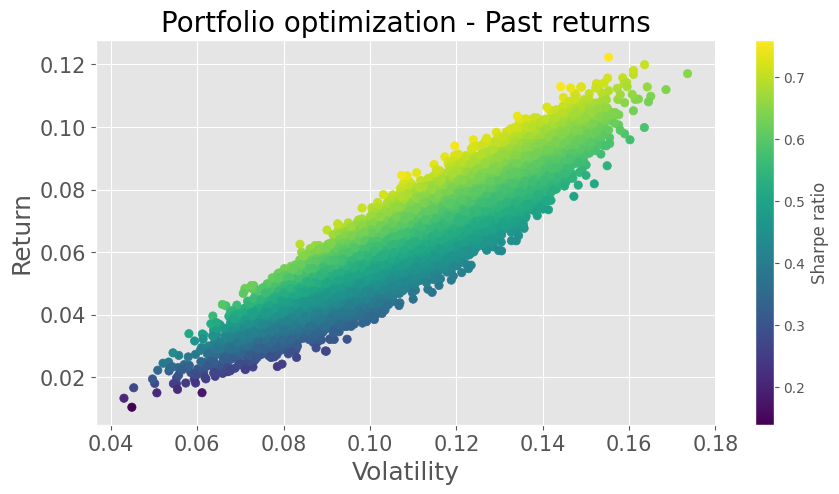

In [29]:
plt.figure(figsize = (10,5))
plt.scatter(portfolio_risks, portfolio_returns, 
           c = (portfolio_returns - rf)/ portfolio_risks)
plt.title('Portfolio optimization - Past returns', fontsize = 20)
plt.xlabel('Volatility', fontsize = 18)
plt.ylabel('Return', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.colorbar(label = 'Sharpe ratio')
plt.show()

## Ottimizzazione con rendimenti attesi

### Creazione rendimenti attesi - Media di media e mediana delle previsioni a 1 anno del sondaggio - 31 dicembre  2023

In [30]:
d = {'LEG1TREU': 0.028, 'LEGATREH':0.04, 'LG30TREH': 0.068, 'MXWOHEUR':0.066,'NDDUWI':0.076,
     'NCUDWI': 0.09, 'NDUEEGF': 0.081}
means_exp = pd.Series(data=d, index=['LEG1TREU','LEGATREH', 'LG30TREH','MXWOHEUR','NDDUWI','NCUDWI','NDUEEGF'])
means_exp

LEG1TREU    0.028
LEGATREH    0.040
LG30TREH    0.068
MXWOHEUR    0.066
NDDUWI      0.076
NCUDWI      0.090
NDUEEGF     0.081
dtype: float64

### Ottimizzazione

In [31]:
portfolio_returns = []
portfolio_risks = []
sharpe_ratios = []
portfolio_weights = []
rf_exp = 0.035
target = 0.06

for portfolio in range(number_of_portfolios):
    weights = np.random.random_sample(len(returns.columns))
    weights =np.round((weights / np.sum(weights)), 3)
    portfolio_weights.append(weights)
    annualized_return = np.sum(means_exp * weights)
    portfolio_returns.append(annualized_return)
    portfolio_variance = np.dot(weights.T, np.dot(mat_cov, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risks.append(portfolio_standard_deviation)
    sharpe_ratio = (annualized_return - rf_exp) / portfolio_standard_deviation
    sharpe_ratios.append(sharpe_ratio)

In [32]:
portfolio_returns = np.array(portfolio_returns)
portofolio_risks = np.array(portfolio_risks)
sharpe_ratios = np.array(sharpe_ratios)

In [33]:
#portfoglio metrics

portfolio_metrics = [portfolio_returns, portfolio_risks, sharpe_ratios, portfolio_weights]
portfolios_df = pd.DataFrame(portfolio_metrics).T
portfolios_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']

min_risk = portfolios_df.iloc[portfolios_df['Risk'].astype(float).idxmin()]
highest_return = portfolios_df.iloc[portfolios_df['Return'].astype(float).idxmax()]
highest_sharpe = portfolios_df.iloc[portfolios_df['Sharpe'].astype(float).idxmax()]
#target_risk = portfolio_df.iloc[(df['Risk']-target).abs().argsort()[:2]]


In [34]:
minr = float(input("Minima tolleranza al rischio: "))

maxr = float(input("Massima tolleranza al rischio: "))

In [35]:
risk_df_exp = portfolios_df.copy()
risk_df_exp = risk_df_exp.drop(risk_df_exp[(risk_df_exp.Risk < minr) | (risk_df_exp.Risk > maxr)].index)

In [36]:
rtn_risk_df_exp = risk_df_exp.sort_values(by = 'Return', ascending=False)

In [37]:
rtn_risk_df_exp = rtn_risk_df_exp.head(10)
rtn_risk_df_exp

,Return,Risk,Sharpe,Weights
3445,0.051555,0.064397,0.257076,"[0.263, 0.287, 0.312, 0.016, 0.011, 0.068, 0.043]"
38161,0.051473,0.064426,0.255687,"[0.309, 0.245, 0.22, 0.026, 0.007, 0.02, 0.173]"
15241,0.05133,0.063035,0.25906,"[0.187, 0.358, 0.36, 0.012, 0.037, 0.005, 0.04]"
14144,0.05099,0.064875,0.246473,"[0.261, 0.36, 0.076, 0.01, 0.108, 0.029, 0.156]"
13698,0.050907,0.062557,0.254281,"[0.349, 0.196, 0.269, 0.016, 0.024, 0.033, 0.113]"
16459,0.050858,0.063416,0.250061,"[0.303, 0.28, 0.215, 0.02, 0.033, 0.064, 0.086]"
39890,0.050837,0.063631,0.248887,"[0.239, 0.313, 0.297, 0.046, 0.035, 0.007, 0.063]"
34063,0.050756,0.063044,0.249921,"[0.252, 0.285, 0.35, 0.031, 0.052, 0.008, 0.022]"
25951,0.050722,0.064577,0.243462,"[0.318, 0.269, 0.145, 0.052, 0.009, 0.026, 0.182]"
38795,0.050651,0.063084,0.248098,"[0.278, 0.291, 0.256, 0.025, 0.052, 0.04, 0.057]"


In [38]:
rtn_risk_df_exp[['LEG1TREU','LEGATREH', 'LG30TREH', 'MXWOHEUR','NDDUWI', 'NCUDWI', 'NDUEEGF']] = pd.DataFrame(rtn_risk_df_exp.Weights.tolist(), index=rtn_risk_df_exp.index)
rtn_risk_df_exp.drop(['Weights'], axis=1, inplace=True)

In [39]:
rtn_risk_df_exp.to_excel('tolerance_risk_returns_exp.xlsx', sheet_name='Best Returns', index=False, startrow=0)

In [40]:
sharpe_risk_df_exp = risk_df_exp.sort_values(by = 'Sharpe', ascending=False)

In [41]:
sharpe_risk_df_exp = sharpe_risk_df_exp.head(10)
sharpe_risk_df_exp

,Return,Risk,Sharpe,Weights
15241,0.05133,0.063035,0.25906,"[0.187, 0.358, 0.36, 0.012, 0.037, 0.005, 0.04]"
3445,0.051555,0.064397,0.257076,"[0.263, 0.287, 0.312, 0.016, 0.011, 0.068, 0.043]"
38161,0.051473,0.064426,0.255687,"[0.309, 0.245, 0.22, 0.026, 0.007, 0.02, 0.173]"
13698,0.050907,0.062557,0.254281,"[0.349, 0.196, 0.269, 0.016, 0.024, 0.033, 0.113]"
16459,0.050858,0.063416,0.250061,"[0.303, 0.28, 0.215, 0.02, 0.033, 0.064, 0.086]"
34063,0.050756,0.063044,0.249921,"[0.252, 0.285, 0.35, 0.031, 0.052, 0.008, 0.022]"
39890,0.050837,0.063631,0.248887,"[0.239, 0.313, 0.297, 0.046, 0.035, 0.007, 0.063]"
38795,0.050651,0.063084,0.248098,"[0.278, 0.291, 0.256, 0.025, 0.052, 0.04, 0.057]"
14144,0.05099,0.064875,0.246473,"[0.261, 0.36, 0.076, 0.01, 0.108, 0.029, 0.156]"
10453,0.050468,0.063503,0.243577,"[0.391, 0.159, 0.273, 0.023, 0.034, 0.086, 0.034]"


In [42]:
sharpe_risk_df_exp[['LEG1TREU','LEGATREH', 'LG30TREH', 'MXWOHEUR','NDDUWI', 'NCUDWI', 'NDUEEGF']] = pd.DataFrame(sharpe_risk_df_exp.Weights.tolist(), index= sharpe_risk_df_exp.index)
sharpe_risk_df_exp.drop(['Weights'], axis=1, inplace=True)

In [43]:
sharpe_risk_df_exp.to_excel('tolerance_risk_sharpe_exp.xlsx', sheet_name='Best Sharpes', index=False, startrow=0)

In [44]:
print('Lowest risk')
print(min_risk)
print(list(returns))
min_risk.to_excel('min_risk_exp.xlsx', sheet_name='Lowest risk', startrow=0)

print('')

print('Highest return')
print(highest_return)
print(list(returns))
highest_return.to_excel('high_ret_exp.xlsx', sheet_name='Highest return', startrow=0)


print('')
      
print('Highest Sharpe ratio')
print(highest_sharpe)
highest_sharpe.to_excel('high_sharpe_exp.xlsx', sheet_name='Highest Sharpe ', startrow=0)
print(list(returns))

print('')


Lowest risk
Return                                              0.043599
Risk                                                0.046267
Sharpe                                              0.185857
Weights    [0.555, 0.174, 0.074, 0.003, 0.014, 0.034, 0.145]
Name: 5659, dtype: object
['LEG1TREU', 'LEGATREH', 'LG30TREH', 'MXWOHEUR', 'NDDUWI', 'NCUDWI', 'NDUEEGF']

Highest return
Return                                             0.080235
Risk                                               0.158854
Sharpe                                             0.284759
Weights    [0.01, 0.004, 0.003, 0.148, 0.178, 0.333, 0.325]
Name: 19056, dtype: object
['LEG1TREU', 'LEGATREH', 'LG30TREH', 'MXWOHEUR', 'NDDUWI', 'NCUDWI', 'NDUEEGF']

Highest Sharpe ratio
Return                                            0.069954
Risk                                              0.109217
Sharpe                                            0.320041
Weights    [0.012, 0.054, 0.589, 0.011, 0.145, 0.03, 0.16]
Name: 25952, dtyp

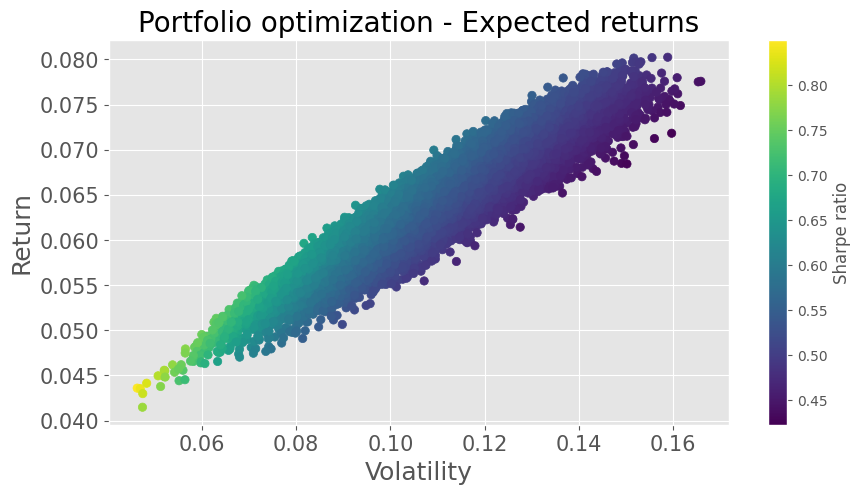

In [45]:
plt.figure(figsize = (10,5))
plt.scatter(portfolio_risks, portfolio_returns, 
           c = (portfolio_returns - rf)/ portfolio_risks)
plt.title('Portfolio optimization - Expected returns', fontsize = 20)
plt.xlabel('Volatility', fontsize = 18)
plt.ylabel('Return', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.colorbar(label = 'Sharpe ratio')
plt.show()

In [46]:
rf

0.004276919806061063

In [47]:
rf_exp

0.035